In [1]:
#plotting function
%matplotlib notebook

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

#spec = 2048

#M = 9999 # number of signals

#filein = "/local/2048_Angles_First.h5"

filein = "/mnt/nndataset/experiment1/run1x1/CNN_dataset.hdf5"

with h5py.File(filein, "r") as f:
    folders = f.keys()
    data = f.get('signals/rx_signals')
    
    #print(data.keys())
    #print(data['labels/signals'])
#     items = list(f.items())
#     print('Items in directory:', items)
#     a1 = f.get('signals')
#     a1_items = list(a1.items())
#     print('Signal items:', a1_items)
    
    
    ######
    signal_data = data[0]
    gen_sigs = np.array(signal_data)
    #print(data.keys())
    
    print(signal_data.shape)
    
    bandwidth = np.array(f.get('labels/bandwidth'))
    centerf = np.array(f.get('labels/center_freq'))
    
    #print(np.max(SNR)) 
    SNR = np.array(f.get('labels/SNR')) # standard deviation np.std deviation (?) or divide by largest number np.max(SNR)
    SNR_sf = np.max(SNR)
    print(SNR_sf)
    SNR = SNR/SNR_sf
   # print(np.max(SNR)) 
    
    
    
    #SNR = SNR/(np.std(SNR))  
    
    #data = np.array(S.get('rx_signals'))
    #dataset = data[0,0,:,:] #Sets the last two dimensions of the 4 dimensional array as the main 
                            #dataset
   

    #print(L.keys())
    #print(dataset.shape)
    #bandwidth = np.array(L.get('bandwidth'))
    #centers = np.array(L.get('center_freq')) #TODO: include frequency in name
    #SNR = np.array(L.get('SNR'))
    

(29951, 2048)
40.19734009146633


In [3]:
dataset_fft = abs(np.fft.fftshift(np.fft.fft(gen_sigs), (1,))) #Pass this into NN.
#plt.plot(abs(dataset_fft[20]))
#plt.show()
#dataset_fft = abs(gen_sigs) #Pass this into NN.

# 2 Dimensional Array


# # Creates a list
# inputdata = np.array([dataset_fft, gen_sigs])
# np.shape(inputdata)
# inputdata = np.swapaxes(inputdata, 0, 1)
# np.shape(inputdata)
# inputdata = np.swapaxes(inputdata, 2, 1)

In [4]:
import os
num_threads = 24
os.environ["OMP_NUM_THREADS"] = "24"
os.environ["TF_NUM_INTRAOP_THREADS"] = "24"
os.environ["TF_NUM_INTEROP_THREADS"] = "24"

import tensorflow as tf

#config = tf.ConfigProto(intra_op_parallelism_threads=24,
#                        inter_op_parallelism_threads=2,
#                        allow_soft_placement=True,
#                        device_count = {'CPU': 24})
#session = tf.Session(config=config)
tf.config.threading.set_intra_op_parallelism_threads(24)
tf.config.threading.set_inter_op_parallelism_threads(24)
tf.config.set_soft_device_placement(True)

#from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
import sys
import h5py
import random
import datetime

#Casts a list indexing from 0 to 9999 for each labeled dataset
#Bandwidth
#print(len(bandwidth))
# idx_bw = list(range(len(bandwidth)))
# idx_cf = list(range(len(centerf)))
# idx_start = list(range(len(start)))
# idx_stop = list(range(len(stop)))


idx = list(range(len(centerf)))
#Center Frequency
#idx_cf = list(range(len(centers)))
#Signal-to-Noise Ratio
#idx_SNR = list(range(len(SNR)))



#Shuffles indices of bandwidth, center freq, and SNR datasets
# random.shuffle(idx_bw)


# Ramdom seed 3700 is shuffling data correctly (omitted seed (5) due to it not shuffling)
random.Random(3700).shuffle(idx)
# random.Random(3700).shuffle(idx_start)
# random.Random(3700).shuffle(idx_stop)
#random.shuffle(idx_SNR)

#Splitting datasets (8000 assigned to training and 2000 to testing)
# training_indices_bw, testing_indices_bw = np.split(idx_bw, [int(0.8*len(idx_bw))])
training_indices, testing_indices = np.split(idx, [int(0.8*len(idx))])



training_data = []
training_labels = []
testing_data = []
testing_labels = []




for idx in training_indices:
    #iterate through all indices and print
    training_data.append(dataset_fft[idx])
    training_labels.append([bandwidth[idx], SNR[idx], centerf[idx]])
    #print(idx)

    #put bandwidth training_data and training_labels into a numpy array.
training_data = tf.convert_to_tensor(np.array(training_data), dtype=tf.float32)
training_labels = tf.convert_to_tensor(np.array(training_labels), dtype=tf.float32)
#training_labels_bw = tf.reshape(training_labels_bw, training_labels_bw.get_shape()+(1,))
   
for idx in testing_indices:
    testing_data.append(dataset_fft[idx])
    testing_labels.append([bandwidth[idx], SNR[idx], centerf[idx]])



print(np.shape(training_data))
print(np.shape(training_labels))


print(np.max(training_labels))

training_data = np.array(training_data)
training_labels = np.array(training_labels)

testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)



2022-04-20 18:40:52.952471: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-20 18:40:52.952494: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-20 18:40:53.952356: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-20 18:40:53.952384: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-20 18:40:53.952404: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc1.marloe-124245.sigdisccnn.emulab.net): /proc/driver/nvidia/version does not exist
2022-04-20 18:40:53.952710: I tensorf

(23960, 2048)
(23960, 3)
1.0


In [5]:
from tensorflow import keras
#from tensorflow.keras.layers import Conv2D

finput = tf.keras.layers.Input(shape = (2048, 1), name = "finput") #2 dimensions
##Conv1D(number of kernels (try as few as 4 and go up by factors of 2, NoMachine?),
##length of the kernel (per discussion on board, try around 300), relu may not be the best, try other activation functions)
##Conv1D(How many kernels, points that define the kernels, activation....)

flayer1 = Conv1D(filters=64/2, kernel_size = 3, activation="tanh", name = "flayer1")(finput)
flayer1 = MaxPooling1D(2, name = "fPool1")(flayer1)

if True:
    flayer2 = Conv1D(filters=128/2, kernel_size = 3, activation = "tanh", name = "flayer2")(flayer1)
    flayer2 = MaxPooling1D(2, name = "fPool2")(flayer2)

    flayer3 = Conv1D(filters=256/2, kernel_size = 3, activation = "tanh", name = "flayer3")(flayer2)
else:
    flayer3 = Conv1D(filters=256/2, kernel_size = 3, activation = "tanh", name = "flayer3")(flayer1)

flayer3 = MaxPooling1D(2, name = "fPool3")(flayer3)

flayer4 = Conv1D(filters= 512/2, kernel_size = 3, activation = "tanh", name = "flayer4")(flayer3)
flayer4 = MaxPooling1D(2, name = "fPool4")(flayer4)   

flayer5 = Flatten(name = "fFlatten")(flayer4)

flayer6 = Dense(64, activation = "tanh", name = "fDense1")(flayer5)

foutput = Dense(3, activation = "tanh", name = "fDense2")(flayer6)


model = tf.keras.models.Model(inputs = finput, outputs = foutput)
model.summary()

#opt = keras.optimizers.Adam(learning_rate = 0.00000001)

opt = keras.optimizers.Adam(learning_rate = 0.000001)

#Johnathan Wintrode
model.compile(loss='mean_squared_error', optimizer = opt)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
finput (InputLayer)          [(None, 2048, 1)]         0         
_________________________________________________________________
flayer1 (Conv1D)             (None, 2046, 32)          128       
_________________________________________________________________
fPool1 (MaxPooling1D)        (None, 1023, 32)          0         
_________________________________________________________________
flayer2 (Conv1D)             (None, 1021, 64)          6208      
_________________________________________________________________
fPool2 (MaxPooling1D)        (None, 510, 64)           0         
_________________________________________________________________
flayer3 (Conv1D)             (None, 508, 128)          24704     
_________________________________________________________________
fPool3 (MaxPooling1D)        (None, 254, 128)          0     

In [ ]:
# from tensorflow import keras
# #from tensorflow.keras.layers import Conv2D

# finput = tf.keras.layers.Input(shape = (2048, 1), name = "finput") #2 dimensions
# ##Conv1D(number of kernels (try as few as 4 and go up by factors of 2, NoMachine?),
# ##length of the kernel (per discussion on board, try around 300), relu may not be the best, try other activation functions)
# ##Conv1D(How many kernels, points that define the kernels, activation....)

# flayer1 = Conv1D(filters=64/2, kernel_size = 3, activation="tanh", name = "flayer1")(finput)
# flayer1 = MaxPooling1D(2, name = "fPool1")(flayer1)

# flayer2 = Conv1D(filters=256/2, kernel_size = 3, activation = "tanh", name = "flayer2")(flayer1)
# flayer2 = MaxPooling1D(2, name = "fPool2")(flayer2)

# flayer3 = Conv1D(filters= 512/2, kernel_size = 3, activation = "tanh", name = "flayer3")(flayer2)
# flayer3 = MaxPooling1D(2, name = "fPool3")(flayer3)   

# flayer4 = Flatten(name = "fFlatten")(flayer3)

# flayer5 = Dense(64, activation = "tanh", name = "fDense1")(flayer4)

# foutput = Dense(3, activation = "tanh", name = "fDense2")(flayer5)


# model = tf.keras.models.Model(inputs = finput, outputs = foutput)
# model.summary()

# #opt = keras.optimizers.Adam(learning_rate = 0.00000001)

# opt = keras.optimizers.Adam(learning_rate = 0.000001)

# #Johnathan Wintrode
# model.compile(loss='mean_squared_error', optimizer = opt)


In [7]:
# IF YOUR KERNEL DIES
model = tf.keras.models.load_model(
    "/local/models/marlomodel.h5", custom_objects=None, compile=True, options=None
)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
finput (InputLayer)          [(None, 2048, 1)]         0         
_________________________________________________________________
flayer1 (Conv1D)             (None, 2046, 32)          128       
_________________________________________________________________
fPool1 (MaxPooling1D)        (None, 1023, 32)          0         
_________________________________________________________________
flayer2 (Conv1D)             (None, 1021, 128)         12416     
_________________________________________________________________
fPool2 (MaxPooling1D)        (None, 510, 128)          0         
_________________________________________________________________
flayer3 (Conv1D)             (None, 508, 256)          98560     
_________________________________________________________________
fPool3 (MaxPooling1D)        (None, 254, 256)          0   

In [6]:
#print(training_data_cf)

In [6]:
filepath = "/local/models/marlomodel.h5"
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='max',
    save_best_only=True)
history_cf = model.fit(training_data, training_labels, epochs=1000, validation_data=(testing_data,testing_labels), callbacks = [callback] )

2022-04-20 18:41:00.742276: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-20 18:41:00.762229: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2600000000 Hz


Epoch 1/1000
749/749 [==============================] - 19s 24ms/step - loss: 0.0546 - val_loss: 0.0095
Epoch 2/1000
749/749 [==============================] - 18s 24ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 3/1000
749/749 [==============================] - 18s 24ms/step - loss: 0.0078 - val_loss: 0.0073
Epoch 4/1000
749/749 [==============================] - 18s 24ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 5/1000
749/749 [==============================] - 18s 24ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 6/1000
749/749 [==============================] - 18s 24ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 7/1000
749/749 [==============================] - 17s 23ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 8/1000
749/749 [==============================] - 18s 24ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 9/1000
749/749 [==============================] - 17s 23ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 10/1000
749/749 [==============================] - 18s 24m

Epoch 76/1000
749/749 [==============================] - 18s 24ms/step - loss: 4.0107e-04 - val_loss: 4.1105e-04
Epoch 77/1000
749/749 [==============================] - 18s 24ms/step - loss: 3.8673e-04 - val_loss: 4.1184e-04
Epoch 78/1000
749/749 [==============================] - 18s 23ms/step - loss: 3.8022e-04 - val_loss: 4.1198e-04
Epoch 79/1000
749/749 [==============================] - 18s 24ms/step - loss: 3.8575e-04 - val_loss: 4.0472e-04
Epoch 80/1000
749/749 [==============================] - 18s 24ms/step - loss: 3.7388e-04 - val_loss: 4.0274e-04
Epoch 81/1000
749/749 [==============================] - 18s 24ms/step - loss: 3.6805e-04 - val_loss: 3.9065e-04
Epoch 82/1000
749/749 [==============================] - 18s 23ms/step - loss: 3.5544e-04 - val_loss: 4.0205e-04
Epoch 83/1000
749/749 [==============================] - 18s 24ms/step - loss: 3.7063e-04 - val_loss: 3.8383e-04
Epoch 84/1000
749/749 [==============================] - 18s 24ms/step - loss: 3.5292e-04 - val_

749/749 [==============================] - 18s 24ms/step - loss: 2.4963e-04 - val_loss: 2.8522e-04
Epoch 149/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.4968e-04 - val_loss: 2.8443e-04
Epoch 150/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.4749e-04 - val_loss: 2.8569e-04
Epoch 151/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.4968e-04 - val_loss: 2.8421e-04
Epoch 152/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.4940e-04 - val_loss: 2.8377e-04
Epoch 153/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.4612e-04 - val_loss: 2.8325e-04
Epoch 154/1000
749/749 [==============================] - 17s 23ms/step - loss: 2.4066e-04 - val_loss: 2.8865e-04
Epoch 155/1000
749/749 [==============================] - 17s 23ms/step - loss: 2.4894e-04 - val_loss: 2.8195e-04
Epoch 156/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.3737e-04 - val_loss: 

Epoch 220/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.1244e-04 - val_loss: 2.6440e-04
Epoch 221/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.1066e-04 - val_loss: 2.8135e-04
Epoch 222/1000
749/749 [==============================] - 18s 23ms/step - loss: 2.0628e-04 - val_loss: 2.5684e-04
Epoch 223/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.0728e-04 - val_loss: 2.5962e-04
Epoch 224/1000
749/749 [==============================] - 17s 23ms/step - loss: 2.0901e-04 - val_loss: 2.5661e-04
Epoch 225/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.0575e-04 - val_loss: 2.5649e-04
Epoch 226/1000
749/749 [==============================] - 18s 23ms/step - loss: 2.0911e-04 - val_loss: 2.5478e-04
Epoch 227/1000
749/749 [==============================] - 17s 23ms/step - loss: 2.0856e-04 - val_loss: 2.5477e-04
Epoch 228/1000
749/749 [==============================] - 18s 24ms/step - loss: 2.0630e-

Epoch 292/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.8585e-04 - val_loss: 2.4848e-04
Epoch 293/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.9043e-04 - val_loss: 2.4270e-04
Epoch 294/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.8420e-04 - val_loss: 2.4434e-04
Epoch 295/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.8229e-04 - val_loss: 2.4888e-04
Epoch 296/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.8822e-04 - val_loss: 2.6843e-04
Epoch 297/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.8679e-04 - val_loss: 2.4639e-04
Epoch 298/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.8455e-04 - val_loss: 2.5257e-04
Epoch 299/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.8450e-04 - val_loss: 2.4622e-04
Epoch 300/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.8412e-

Epoch 364/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.7547e-04 - val_loss: 2.4413e-04
Epoch 365/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.7360e-04 - val_loss: 2.4801e-04
Epoch 366/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.7046e-04 - val_loss: 2.4495e-04
Epoch 367/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.7081e-04 - val_loss: 2.4225e-04
Epoch 368/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.7281e-04 - val_loss: 2.4994e-04
Epoch 369/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.7022e-04 - val_loss: 2.4162e-04
Epoch 370/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.6881e-04 - val_loss: 2.4379e-04
Epoch 371/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.7225e-04 - val_loss: 2.4091e-04
Epoch 372/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.6716e-

Epoch 436/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5999e-04 - val_loss: 2.3827e-04
Epoch 437/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5945e-04 - val_loss: 2.4113e-04
Epoch 438/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5870e-04 - val_loss: 2.3789e-04
Epoch 439/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.6029e-04 - val_loss: 2.4362e-04
Epoch 440/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5748e-04 - val_loss: 2.4336e-04
Epoch 441/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5794e-04 - val_loss: 2.4561e-04
Epoch 442/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5994e-04 - val_loss: 2.3727e-04
Epoch 443/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5732e-04 - val_loss: 2.4590e-04
Epoch 444/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5904e-

Epoch 508/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.5069e-04 - val_loss: 2.3624e-04
Epoch 509/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.4880e-04 - val_loss: 2.3808e-04
Epoch 510/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.4883e-04 - val_loss: 2.3876e-04
Epoch 511/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.4956e-04 - val_loss: 2.4342e-04
Epoch 512/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.5007e-04 - val_loss: 2.3728e-04
Epoch 513/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.4860e-04 - val_loss: 2.4374e-04
Epoch 514/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.4900e-04 - val_loss: 2.3985e-04
Epoch 515/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.4678e-04 - val_loss: 2.3531e-04
Epoch 516/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.4718e-

Epoch 580/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.3972e-04 - val_loss: 2.3598e-04
Epoch 581/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.4086e-04 - val_loss: 2.4306e-04
Epoch 582/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.4035e-04 - val_loss: 2.4555e-04
Epoch 583/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.4014e-04 - val_loss: 2.3860e-04
Epoch 584/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.3897e-04 - val_loss: 2.3939e-04
Epoch 585/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.3782e-04 - val_loss: 2.3785e-04
Epoch 586/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.4013e-04 - val_loss: 2.3959e-04
Epoch 587/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.4193e-04 - val_loss: 2.3640e-04
Epoch 588/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.4194e-

Epoch 652/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.3232e-04 - val_loss: 2.4402e-04
Epoch 653/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.3302e-04 - val_loss: 2.3691e-04
Epoch 654/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.3256e-04 - val_loss: 2.3836e-04
Epoch 655/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.3402e-04 - val_loss: 2.4170e-04
Epoch 656/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.3230e-04 - val_loss: 2.3841e-04
Epoch 657/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.3271e-04 - val_loss: 2.3757e-04
Epoch 658/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.3217e-04 - val_loss: 2.3970e-04
Epoch 659/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.3197e-04 - val_loss: 2.3984e-04
Epoch 660/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.3402e-

Epoch 724/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.2576e-04 - val_loss: 2.3974e-04
Epoch 725/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.2637e-04 - val_loss: 2.3973e-04
Epoch 726/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.2644e-04 - val_loss: 2.4019e-04
Epoch 727/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.2212e-04 - val_loss: 2.3977e-04
Epoch 728/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.2302e-04 - val_loss: 2.4036e-04
Epoch 729/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.2582e-04 - val_loss: 2.3901e-04
Epoch 730/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.2288e-04 - val_loss: 2.4005e-04
Epoch 731/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.2385e-04 - val_loss: 2.4488e-04
Epoch 732/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.2481e-

Epoch 796/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.1839e-04 - val_loss: 2.4266e-04
Epoch 797/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.1836e-04 - val_loss: 2.4238e-04
Epoch 798/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.1584e-04 - val_loss: 2.4058e-04
Epoch 799/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.1858e-04 - val_loss: 2.4921e-04
Epoch 800/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.1790e-04 - val_loss: 2.4287e-04
Epoch 801/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.1990e-04 - val_loss: 2.4160e-04
Epoch 802/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.1825e-04 - val_loss: 2.4185e-04
Epoch 803/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.1539e-04 - val_loss: 2.4952e-04
Epoch 804/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.1781e-

Epoch 868/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.1074e-04 - val_loss: 2.4575e-04
Epoch 869/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.1295e-04 - val_loss: 2.4649e-04
Epoch 870/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.1257e-04 - val_loss: 2.4808e-04
Epoch 871/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.1150e-04 - val_loss: 2.5146e-04
Epoch 872/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.1203e-04 - val_loss: 2.4553e-04
Epoch 873/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.1291e-04 - val_loss: 2.5246e-04
Epoch 874/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.1101e-04 - val_loss: 2.4557e-04
Epoch 875/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.1196e-04 - val_loss: 2.4450e-04
Epoch 876/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.1095e-

Epoch 940/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.0864e-04 - val_loss: 2.4848e-04
Epoch 941/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.0557e-04 - val_loss: 2.4611e-04
Epoch 942/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.0742e-04 - val_loss: 2.4707e-04
Epoch 943/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.0779e-04 - val_loss: 2.4752e-04
Epoch 944/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.0657e-04 - val_loss: 2.4583e-04
Epoch 945/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.0368e-04 - val_loss: 2.4662e-04
Epoch 946/1000
749/749 [==============================] - 18s 24ms/step - loss: 1.0443e-04 - val_loss: 2.4893e-04
Epoch 947/1000
749/749 [==============================] - 18s 23ms/step - loss: 1.0609e-04 - val_loss: 2.4681e-04
Epoch 948/1000
749/749 [==============================] - 17s 23ms/step - loss: 1.0721e-

In [7]:
loss = model.evaluate(testing_data, batch_size=128)
print("test loss, test acc:", loss)
print(loss)
print(history_cf.history)

#mean square
loss = history_cf.history['loss']
val_loss = history_cf.history['val_loss']
#epochs = range(1,9)


#Root mean square
sqrt_loss = np.sqrt(loss)
sqrt_val_loss = np.sqrt(val_loss)


plt.loglog(sqrt_loss, 'r', label='Training Loss')
plt.loglog(sqrt_val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

47/47 [==============================] - 0s 549us/step - loss: 0.0000e+00
test loss, test acc: 0.0
0.0
{'loss': [0.022509805858135223, 0.00860091857612133, 0.007558170706033707, 0.006811081897467375, 0.006154745351523161, 0.005555436480790377, 0.005023659206926823, 0.004526883829385042, 0.004068806301802397, 0.00363046838901937, 0.0032183025032281876, 0.0028381659649312496, 0.00250476086512208, 0.002223782939836383, 0.0020008282735943794, 0.0018191129202023149, 0.0016862506745383143, 0.0015779711538925767, 0.0014941280242055655, 0.0014246746432036161, 0.0013650975888594985, 0.0013175323838368058, 0.0012704303953796625, 0.0012287510326132178, 0.0011908593587577343, 0.001159505802206695, 0.0011264069471508265, 0.0010986016131937504, 0.001072748564183712, 0.0010477352188900113, 0.0010232042986899614, 0.0009994141291826963, 0.000979510135948658, 0.0009611479472368956, 0.0009416059474460781, 0.0009233535383827984, 0.0009060223819687963, 0.0008876840583980083, 0.0008693981799297035, 0.000852

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


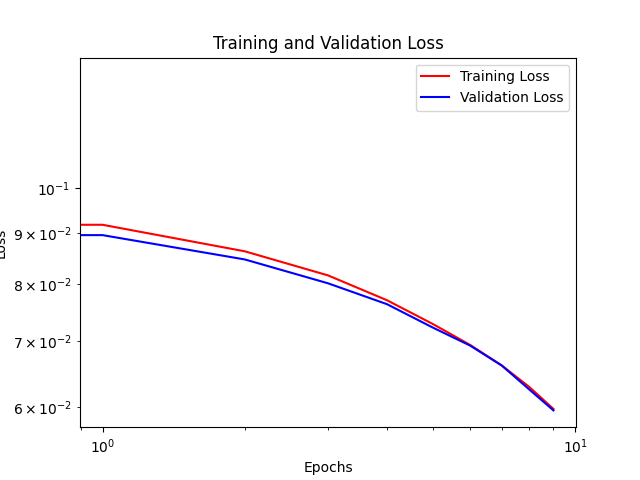

In [9]:
plt.figure()
plt.loglog(sqrt_loss, 'r', label='Training Loss')
plt.loglog(sqrt_val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Index value: 2155
Inferred value: [ 0.14209113  0.8731846  -0.11676294]
Actual value: [ 0.1540958   0.86570765 -0.1125702 ]


<IPython.core.display.Javascript object>


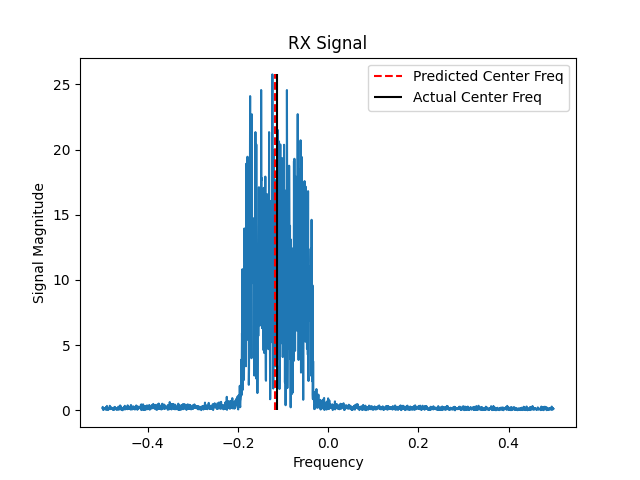

In [8]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')

plt.show()

plt.savefig("cf1.svg", format = "svg")

Index value: 496
Inferred value: [ 0.78970873  0.84003335 -0.00519951]
Actual value: [7.80910200e-01 8.32241877e-01 2.67600000e-04]


<IPython.core.display.Javascript object>


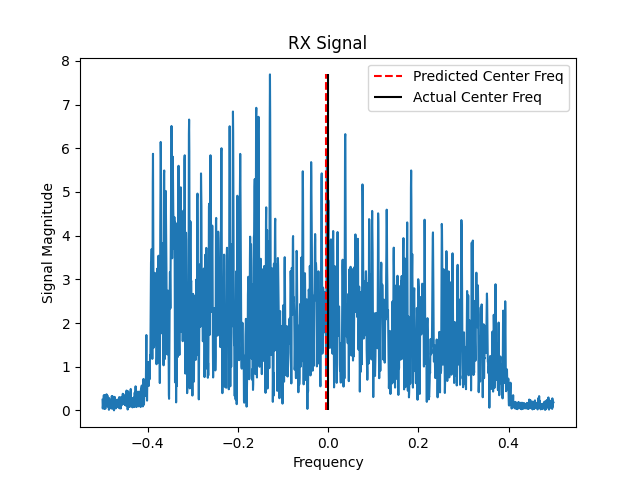

In [9]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')

plt.show()

plt.savefig("cf2.svg", format = "svg")

Index value: 5041
Inferred value: [0.6095734  0.21762648 0.03757167]
Actual value: [0.627675   0.24208093 0.030848  ]


<IPython.core.display.Javascript object>


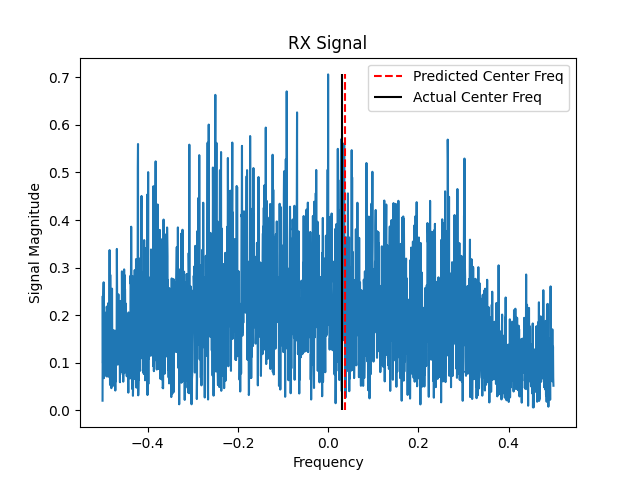

In [10]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')
#plt.savefig("filename.svg", format = "svg")
plt.show()
plt.savefig("cf3.svg", format = "svg")

In [11]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')

plt.show()

plt.savefig("cf4.svg", format = "svg")

Index value: 4438
Inferred value: [0.74138045 0.93156624 0.03403486]
Actual value: [0.7438296  0.93779561 0.026742  ]


<IPython.core.display.Javascript object>

Index value: 38
Inferred value: [0.815916   0.78444487 0.0012198 ]
Actual value: [ 0.8103796  0.7927854 -0.0049754]


<IPython.core.display.Javascript object>


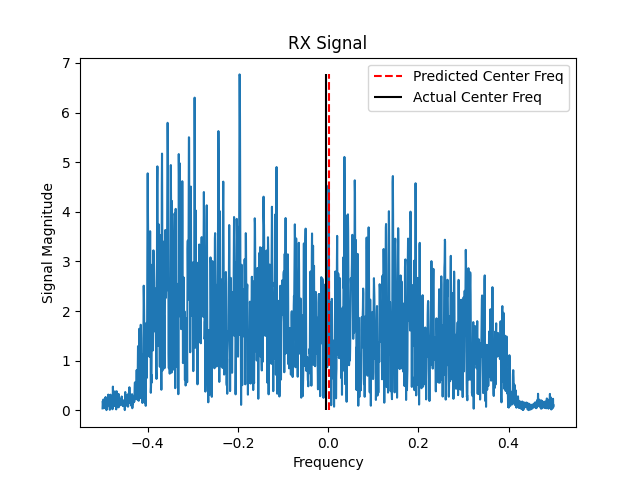

In [12]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')
#plt.savefig("filename.svg", format = "svg")
plt.show()
plt.savefig("cf5.svg", format = "svg")

Index value: 3149
Inferred value: [0.66092783 0.9522057  0.04151436]
Actual value: [0.6591468  0.91523907 0.0382936 ]


<IPython.core.display.Javascript object>


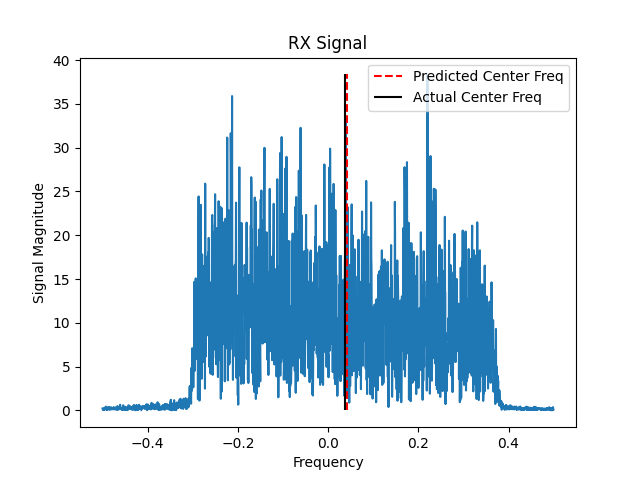

In [13]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')
#plt.savefig("filename.svg", format = "svg")
plt.show()
plt.savefig("cf6.svg", format = "svg")

In [14]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')
#plt.savefig("filename.svg", format = "svg")
plt.show()
plt.savefig("cf7.svg", format = "svg")

Index value: 2830
Inferred value: [ 0.5078801   0.26806697 -0.04636977]
Actual value: [ 0.5325208   0.25981243 -0.0434448 ]


<IPython.core.display.Javascript object>

In [15]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')
#plt.savefig("filename.svg", format = "svg")
plt.show()
plt.savefig("cf8.svg", format = "svg")

Index value: 3788
Inferred value: [ 0.79170096  0.81344986 -0.0055399 ]
Actual value: [0.7885834  0.81165638 0.0087306 ]


<IPython.core.display.Javascript object>

Index value: 5331
Inferred value: [0.73254627 0.8233916  0.01091323]
Actual value: [0.7392912  0.81694551 0.01012   ]


<IPython.core.display.Javascript object>


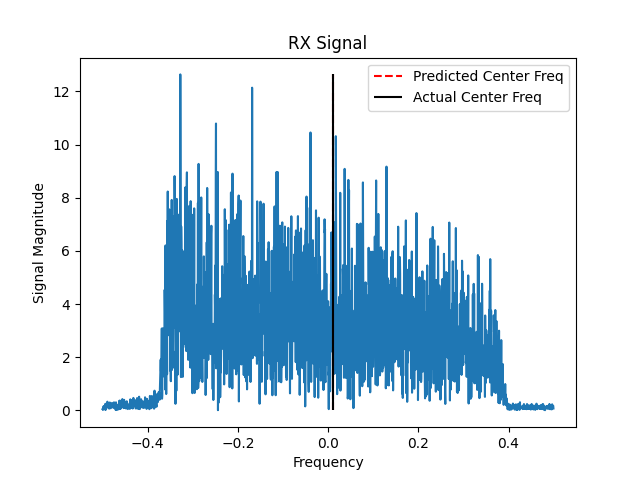

In [16]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')
#plt.savefig("filename.svg", format = "svg")
plt.show()
plt.savefig("cf9.svg", format = "svg")

Index value: 861
Inferred value: [0.62170744 0.9425923  0.04894207]
Actual value: [0.615954   0.91414959 0.0474392 ]


<IPython.core.display.Javascript object>


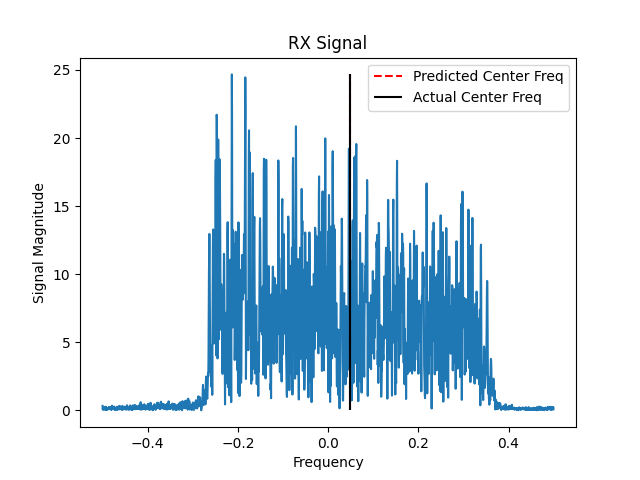

In [17]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])

predict_list = predict_cf[random_index].tolist()
testing_list = testing_labels[random_index].tolist()
#print("test", predict_list[0])
#print(np.max(testing_data[random_index]))

# output: bw, SNR, cf

plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(testing_data[random_index]))

plt.vlines((predict_list[2]), 0, np.max(testing_data[random_index]), colors = "r", linestyles = "dashed", label = 'Predicted Center Freq')
plt.vlines((testing_list[2]), 0, np.max(testing_data[random_index]), colors = "k", linestyles = "solid", label = 'Actual Center Freq')
plt.legend()
plt.title('RX Signal')
plt.ylabel('Signal Magnitude')
plt.xlabel('Frequency')
#plt.savefig("filename.svg", format = "svg")
plt.show()
plt.savefig("cf10.svg", format = "svg")

<IPython.core.display.Javascript object>


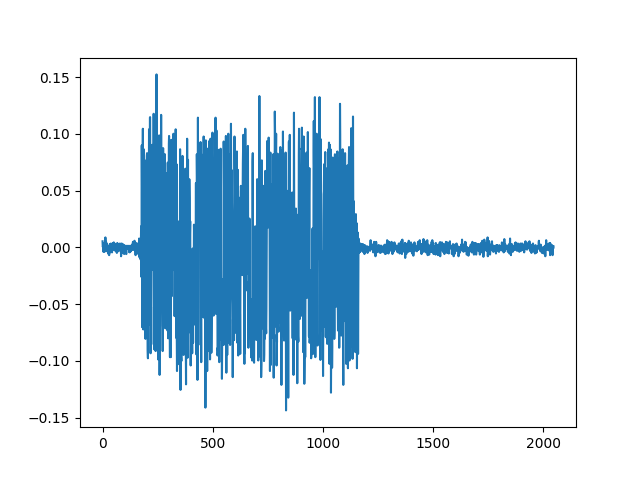

/local/dev/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [15]:
plt.figure()
plt.plot(gen_sigs[random_index])
plt.show()


In [10]:
plt.figure()
plt.plot(gen_sigs[random_index])

<IPython.core.display.Javascript object>

/local/dev/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Index value: 4696
Inferred value: [0.738259   0.82475424 0.05580233]
Actual value: [0.7626394  0.81851818 0.040787  ]
0.071044


<IPython.core.display.Javascript object>


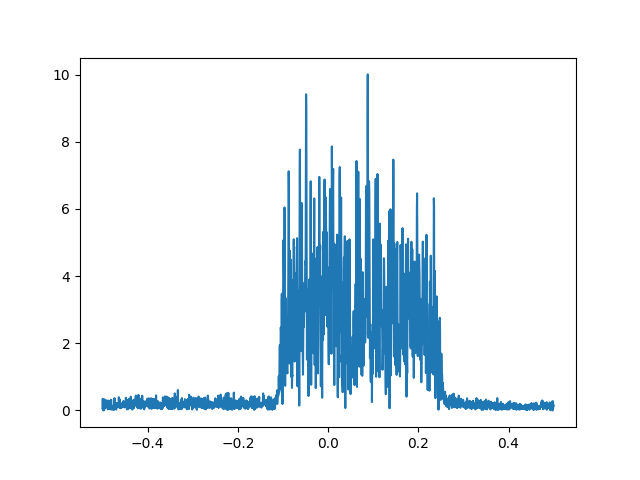

In [18]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])
print(centerf[random_index])



plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(dataset_fft[random_index]))
plt.show()


Index value: 723
Inferred value: [ 0.7930518   0.9331132  -0.03425229]
Actual value: [ 0.7956626   0.94982464 -0.0300584 ]


<IPython.core.display.Javascript object>


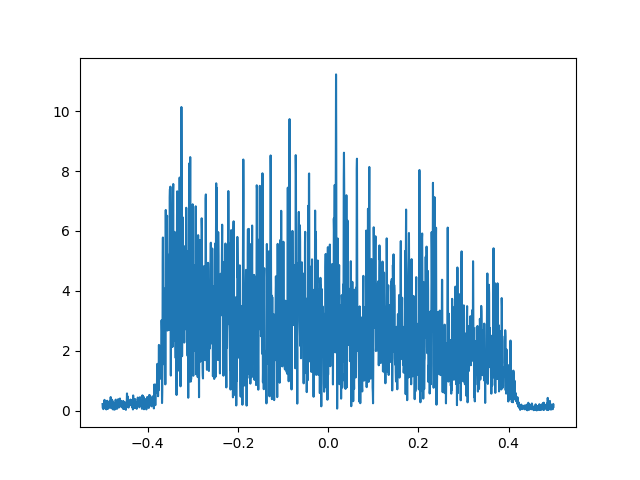

In [23]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])



plt.figure()
num_frequencies = signal_data.shape[1]
start_frequency = -0.5
stop_frequency = (num_frequencies // 2 - 1) / num_frequencies
plt.plot(np.linspace(start_frequency, stop_frequency, num_frequencies),
         abs(dataset_fft[random_index]))
plt.show()


In [16]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])
print(centerf[random_index])

Index value: 2627
Inferred value: [0.61639386 0.2163418  0.06737908]
Actual value: [0.6041006  0.23696989 0.0384532 ]
-0.0406362


In [17]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels)-1)

print("Index value:", random_index)

predict_cf = model.predict(testing_data)

print("Inferred value:", predict_cf[random_index])
print("Actual value:", testing_labels[random_index])
print(centerf[random_index])

Index value: 2427
Inferred value: [ 0.11599883  0.26472372 -0.1002478 ]
Actual value: [ 0.1765962   0.26694461 -0.0841622 ]
0.0188362


In [14]:
plt.plot(sqrt_loss, 'r', label='Training Loss')
plt.plot(sqrt_val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_cf = model.evaluate(testing_data_cf, batch_size=128)
print("test loss, test acc:", loss_cf)
print(loss_cf)
print(history_cf.history)

#mean square
loss_cf = history_cf.history['loss']
val_loss_cf = history_cf.history['val_loss']
#epochs = range(1,9)


#Root mean square
sqrt_loss = np.sqrt(loss_cf)
sqrt_val_loss = np.sqrt(val_loss_cf)

In [ ]:
plt.figure()
plt.loglog(sqrt_loss, 'r', label='Training Loss')
plt.loglog(sqrt_val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model.save('freqmodel.h5')